In [78]:
import pandas as pd
import numpy as np
import seaborn as sns

#import scikitplot as skplt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

from sklearn.model_selection import cross_val_score

#visualating tree-s
from sklearn import tree

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

kaggle
In this work we will try to predict the mean value of the owner-occupied homes in Boston, using different regression algorithms. The dataset we will use have been downloaded form: [here](https://www.kaggle.com/prasadperera/the-boston-housing-dataset/data) . This dataset is compose by the following columns:

* **CRIM** - per capita crime rate by town
* **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS** - proportion of non-retail business acres per town.
* **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* **NOX** - nitric oxides concentration (parts per 10 million)
* **RM** - average number of rooms per dwelling
* **AGE** - proportion of owner-occupied units built prior to 1940
* **DIS** - weighted distances to five Boston employment centres
* **RAD** - index of accessibility to radial highways
* **TAX** - full-value property-tax rate per 10,000 dollars
* **PTRATIO** - pupil-teacher ratio by town
* **B** - 1000dollars(Bk - 0.63)^2dollars where Bk is the proportion of blacks by town
* **LSTAT** - % lower status of the population
* **MEDV** - Median value of owner-occupied homes in $1000's




# DATASET SELECTION & analysis

In this first section we will make an analysis of the variables contained in our dataset and we will select the variables that best fit the prediction of our model.

First of all we will charge our dataset in the varible *boston*  as a pandasDataframe:

In [79]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [80]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


As we can see, we have 13 different variables of which 12 of them will be used as features and the remainingg one, "MEDV" , will be used a predictor variable (the target). In addition, we have to take into acount that all data types are floats and that we don`t have any categorical data. Finally observe that there are no missing values in our dataset.

Let's take a look at the statistical data for each variable:

In [81]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

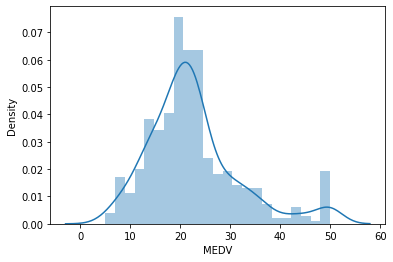

In [82]:
#Plot the distribution of
sns.distplot(boston['MEDV'])

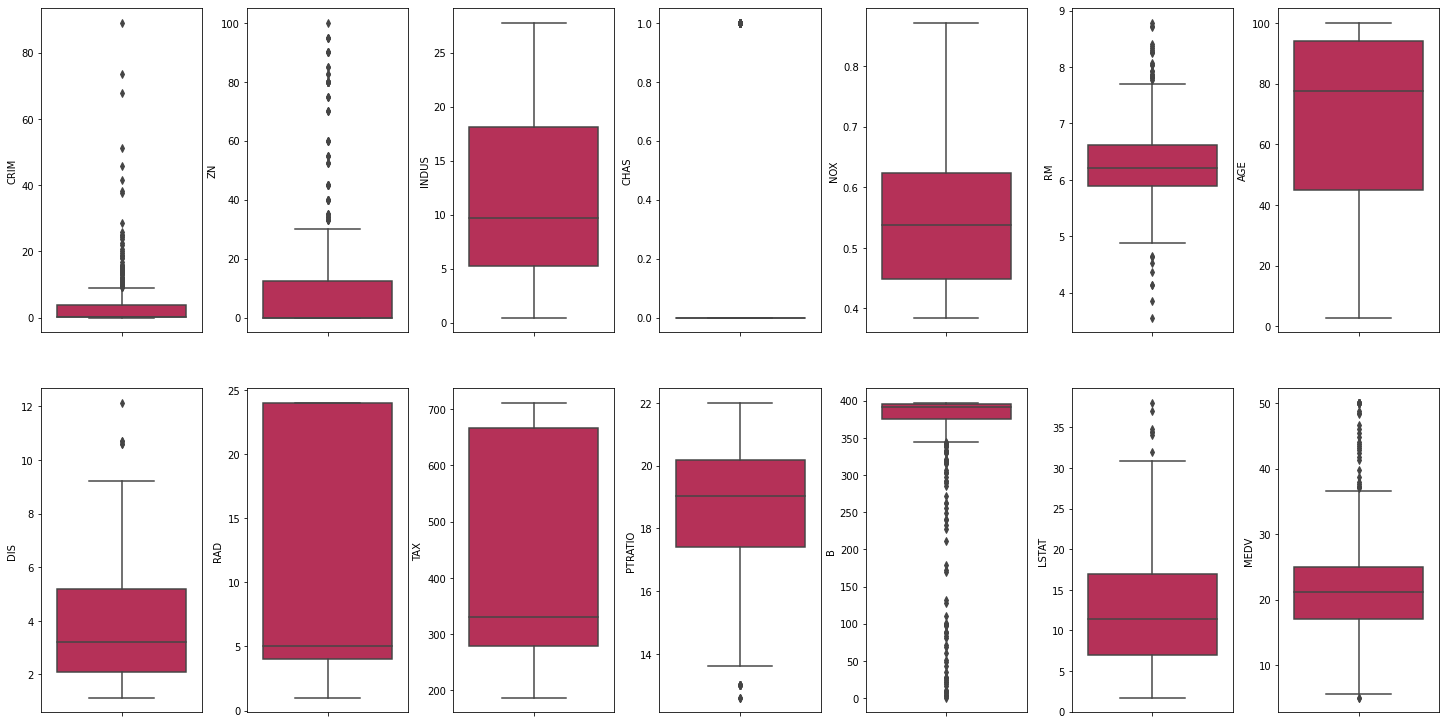

In [83]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston.items():
    sns.boxplot(y=k, data=boston, ax=axs[index], palette = "rocket")
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

plt.savefig('Images/boxplot.png')


As we can see in the histogram plot, the variable "MEDV" follows a normal distribution centred on the mean 22.53. Let us note, moreover, that we have some ouliers on the right-hand side of our graphs. On the ther hand, as we can see some of our features such a as "CRIM", "ZN", "CHAS", "RM", "PTRATIO", "B", "LSTAT" has outliers. We do not know the precentage of this ouliers so we will calculate them and then we will decide how to procedeed.

In [84]:
#checking percentage/ amount of outliers
for i in boston.columns:
    boston.sort_values(by=i, ascending=True, na_position='last')
    q1, q3 = np.nanpercentile(boston[i], [25,75])
    iqr = q3-q1
    lower_bound = q1-(1.5*iqr) #define upper
    upper_bound = q3+(1.5*iqr) # define lower
    outlier_data = boston[i][(boston[i] < lower_bound) | (boston[i] > upper_bound)]
    perc = (outlier_data.count()/boston[i].count())*100
    print('Outliers in %s: %.2f%% with'
          ' count %.f, lower bound %f, upper bound %f' %(i, perc, outlier_data.count(),
                                                         lower_bound, upper_bound))
  # #----------------------seve Upper and Lower outliers----------------------
    if i == 'B':
      outlierDataB_index = outlier_data.index
      outlierDataB_LB = boston[i][(boston[i] < lower_bound)]
      outlierDataB_UB = boston[i][(boston[i] > upper_bound)]
    elif i == 'CRIM':
      outlierDataCRIM_index = outlier_data.index
      outlierDataCRIM_LB = boston[i][(boston[i] < lower_bound)]
      outlierDataCRIM_UB = boston[i][(boston[i] > upper_bound)]
    elif i == 'ZN':
      outlierDataZN_index = outlier_data.index
      outlierDataZN_LB = boston[i][(boston[i] < lower_bound)]
      outlierDataZN_UB = boston[i][(boston[i] > upper_bound)]
    elif i == 'MEDV':
      lowerBoundMEDV = lower_bound
      upperBoundMEDV = upper_bound

print ("-"*20+"\n")
print (f"B- upper: {outlierDataB_UB.count()} \tlower: {outlierDataB_LB.count()}")
print (f"CRIM- upper: {outlierDataCRIM_UB.count()} \tlower: {outlierDataCRIM_LB.count()}")
print (f"ZN- upper: {outlierDataZN_UB.count()} \tlower: {outlierDataZN_LB.count()}")
#print (f"MEDV- upper: {outlierDataMEDV_UB.count()} \t lower {outlierDataMEDV_LB.count()}\n")

Outliers in CRIM: 13.04% with count 66, lower bound -5.310511, upper bound 9.069639
Outliers in ZN: 13.44% with count 68, lower bound -18.750000, upper bound 31.250000
Outliers in INDUS: 0.00% with count 0, lower bound -14.175000, upper bound 37.465000
Outliers in CHAS: 6.92% with count 35, lower bound 0.000000, upper bound 0.000000
Outliers in NOX: 0.00% with count 0, lower bound 0.186500, upper bound 0.886500
Outliers in RM: 5.93% with count 30, lower bound 4.778500, upper bound 7.730500
Outliers in AGE: 0.00% with count 0, lower bound -28.550000, upper bound 167.650000
Outliers in DIS: 0.99% with count 5, lower bound -2.532200, upper bound 9.820800
Outliers in RAD: 0.00% with count 0, lower bound -26.000000, upper bound 54.000000
Outliers in TAX: 0.00% with count 0, lower bound -301.500000, upper bound 1246.500000
Outliers in PTRATIO: 2.96% with count 15, lower bound 13.200000, upper bound 24.400000
Outliers in B: 15.22% with count 77, lower bound 344.106250, upper bound 427.496250


As we can see, "CRIM", "ZN" and "B" variables show a high percentage of outliers compared to the rest. Since this data can be detrimental to our prediction, it is convenient to treat the outliers. One of the options we have now is to discard all lines containing outliers. However, this procedure would cause us to lose a large amount of data. Another alternative is to replace the outliers by a statistic such as the mean, median... Although in this case the amount of data lost would be zero, we could end up with a model that is too biased. Therefore, we will proceed to use an intermediate strategy. That is, we will remove all the data that exceed a set limit and replace all the remaining outliers by the mean of each variable.

We know that, we do not have upper outliers for the variable 'B' and that we don't have lower outliers for both variables 'CRIM' and 'ZN'. So we will delete the upper or lower half of the outliers and we will replace the remaning part by the mean value of each feature:


In [85]:
dataset2 = boston.copy()

In [86]:
#remove extreme outliers.
removed=[]

outlierDataB_LB.sort_values(ascending=True, inplace = True) #inplace overwrites the existing df.
outlierDataCRIM_UB.sort_values(ascending = False, inplace = True)
outlierDataZN_UB.sort_values(ascending = False, inplace = True)

counter=1
for i in  outlierDataB_LB.index:
    if (counter < 39):
        dataset2.drop(index=i, inplace=True)
        counter+=1
        removed.append(i)

counter = 1
for i in outlierDataCRIM_UB.index:
    if ((counter < 34) & (i not in removed)):
        dataset2.drop(index=i, inplace=True)
        counter+=1
        removed.append(i)

counter = 1
for i in outlierDataZN_UB.index:
    if ((counter < 35) & (i not in removed)):
        dataset2.drop(index=i, inplace=True)
        counter+=1
        removed.append(i)

dataset2.shape

(401, 14)

In [87]:
df3 = dataset2.copy()

In [88]:
#replace the rest by the mean
for i in df3.columns:
    boston.sort_values(by=i, ascending=True, na_position='last')
    q1, q3 = np.nanpercentile(boston[i], [25,75])
    iqr = q3-q1
    lower_bound = q1-(1.5*iqr) #define lower
    upper_bound = q3+(1.5*iqr) # define upper
    mean = df3[i].mean()
    if ( i != 'MEDV'): # for all the feature columns
        df3.loc[ df3[i] < lower_bound, [i]] = mean
        df3.loc[df3[i] > upper_bound, [i] ] = mean
    else:
        df3.loc[df3[i] < lower_bound, [i]] = mean
        df3.loc[df3[i] > upper_bound, [i]] = 50

In [89]:
df3.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,401.000000,401.00000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,1.143826,4.10494,10.643716,0.006772,0.544929,6.232876,67.848628,3.804215,7.768080,375.184539,18.518190,387.984897,11.587617,23.883791
std,1.993836,8.10008,6.633953,0.022644,0.106814,0.498706,27.184801,1.809642,7.364006,149.820095,1.889067,10.901836,5.945805,9.277654
min,0.006320,0.00000,1.250000,0.000000,0.389000,4.903000,2.900000,1.129600,1.000000,188.000000,14.700000,344.910000,1.730000,6.300000
25%,0.084470,0.00000,5.320000,0.000000,0.453000,5.913000,45.800000,2.346000,4.000000,277.000000,17.400000,381.963791,6.930000,18.700000
50%,0.211240,0.00000,8.140000,0.000000,0.520000,6.209000,74.300000,3.421700,5.000000,307.000000,18.600000,392.230000,10.420000,21.900000
75%,1.130810,0.00000,18.100000,0.000000,0.605000,6.487000,92.600000,4.967100,7.000000,411.000000,20.200000,396.240000,14.980000,25.100000
max,8.982960,30.00000,27.740000,0.082294,0.871000,7.691000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,30.810000,50.000000


### CORRELATION

Once we have done the outlier treating we have to search the correlations between the different features.

Next we will select some columns based on how they affect the p-value.

* **Null hypothesis**: The selected combination of dependent variables do not have any effect on the independent variable (MEDV).
* Build a regrasion mode and calculate the p-values.
* if p values > 0.05 (our chosen threshold) we can say that the selected compbinatios is not significative and therefore we can discard it (i.e the we can't reject the Null hypothesis)

In [90]:
features = df3.iloc[:,:-1]
target  = df3.iloc[:,13]

def BackwardElimination(sl, w, Y):
    for i in range(0, len(w.columns)):
        regressor_OLS = sm.OLS(endog=Y, exog=w).fit()
        max_pvalue = max(regressor_OLS.pvalues)
        pvalues = regressor_OLS.pvalues
        if max_pvalue > SL:
            index_max_pvalue = pvalues[pvalues==max_pvalue].index
            w = w.drop(index_max_pvalue, axis = 1) #delete the valriable for that p value
    return w,pvalues,index_max_pvalue

    regressor_OLS.summary()
    return x, columns


SL = 0.05
ones = np.ones((401,1))
W = features
W.insert(0, 'Constant', ones, True)
W_optimal = W.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12]]

W_optimal,pvalues,index_max_pvalue = BackwardElimination(SL, W_optimal, target)
features = W_optimal.drop('Constant', axis=1)

pvalues


Constant    2.289015e-04
INDUS       1.267656e-02
CHAS        4.448793e-02
NOX         2.906787e-03
RM          6.180831e-20
AGE         2.726098e-02
DIS         7.406610e-11
RAD         1.874650e-03
TAX         3.326709e-03
PTRATIO     2.938886e-08
B           2.271487e-02
dtype: float64

In [91]:
df4 = features.copy()
df4["MEDV"] = target
df4

,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,MEDV
0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,24.0
1,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,21.6
2,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,34.7
3,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,33.4
4,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,22.4
502,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,20.6
503,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,23.9
504,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,22.0


<AxesSubplot:>

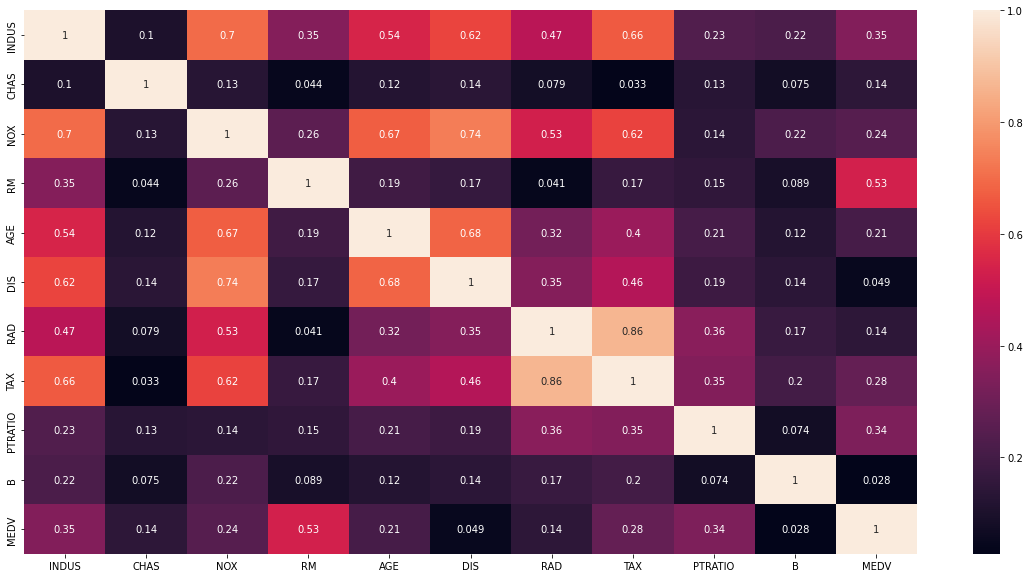

In [92]:
plt.figure(figsize=(20, 10))
corr_matrix = df4.corr().abs()
sns.heatmap(corr_matrix, annot = True)

As we can see, we have 3 pairs of variables correlated with each other with a score higher or equal to 0.7:

* **INDUS** and **NOX** are highly correlated with a score of 0.70
* **NOX** and **DIS** are highly correlated with a score of 0.74
* **RAD** and **TAX** are highly correlated with a score of 0.86

On the one hand, taking into account that the scores between the NOX variables are highly correlated with 2 different variables and seeing that it also has a lower final score (last column of the graph) with respect to the INDUS variable, we have decided to eliminate the NOX column.

On the other hand, as we can se, RAD an TAX are highly correlated. However if we look at the last column, we can conclude that the efect on the response variable is more remarkable in the case of TAX. Therefore, we will also eliminate the RAD column




In [93]:
df4.drop('RAD', axis=1, inplace=True)
df4.drop('NOX', axis=1, inplace=True)

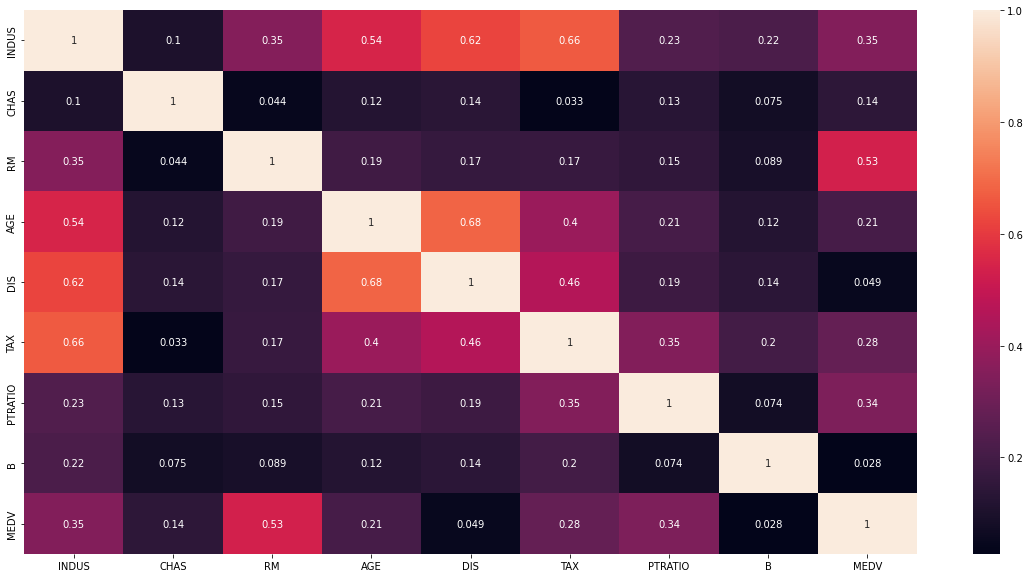

In [94]:
plt.figure(figsize=(20, 10))
corr_matrix = df4.corr().abs()
sns.heatmap(corr_matrix, annot = True)

plt.savefig('Images/correlation.png')

In [95]:
df4.iloc[:,:-1].columns

Index(['INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B'], dtype='object')

In [96]:
df4.to_csv("df4.csv",index=False)

# MODEL FITTING

In this section we will use the modificated dataset "df4" form the previous part to build a model that will predict the 'MEDV'. We will use two differente models:

* Regresion Trees
* Random forest



### Regresion Tree

Firstly, as always we have to devide our dataset into a training and test part. In this case we have decided to use the 70% of the total data ( 280 row-s) for training and the resultant 30% (121 row-s) for testing.

In [97]:
X = df4.iloc[:,:-1]
target  = df4['MEDV']

#X_train,X_test,y_train,y_test = train_test_split(X, target, test_size = 0.3, random_state=23)
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.30, random_state =0)
print(f"X_train_shape: {X_train.shape}\n y_train_shape: {y_train.shape}\n"
      f" X_test_shape: {X_test.shape}\n y_test_shape: {y_test.shape}")

X_train_shape: (280, 8)
 y_train_shape: (280,)
 X_test_shape: (121, 8)
 y_test_shape: (121,)


Firstly, we will train a model with the dafault parameters:

In [98]:
    first_tree_model = DecisionTreeRegressor(random_state = 0)
    first_tree_model.fit(X_train, y_train)
    score_in = first_tree_model.score(X_train, y_train)
    score_out = first_tree_model.score(X_test, y_test)

    print (f"score in: {score_in} Score out: {score_out}")

score in: 1.0 Score out: 0.6916706357025082


The model is clearly over-fitted. Let's make some changes.

In [99]:
#Let's define some metrics for regresion models : MSE Link: https://towardsdatascience.com/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce
def MSE_metric(y_true, y_predict):
    """ Returns mean squared error (MSE) between true and predicted values """
    error = mean_squared_error(y_true, y_predict)
    return error

def fit_tree_cv(X,y):
    """
    :param X: Features form train or test df. dim: (n,m).
    :param y: Target from train or test df. dim: (n,).
    :return: optimal model based on CV (find the best parameters).
    """
    regressor = DecisionTreeRegressor()
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
    # greater_is_better = False because small error is favorable
    scoring_function = make_scorer(MSE_metric, greater_is_better = False)
    reg = GridSearchCV(regressor, parameters, scoring = scoring_function, cv = 3)
    reg.fit(X,y)
    return reg.best_estimator_


In [100]:
reg = fit_tree_cv(X_train, y_train)
print(reg)

DecisionTreeRegressor(max_depth=4)


In [101]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted.
    """
    # Create the figure window
    fig = plt.figure(figsize=(20,20))
    # Cary the training set size for 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,2,3,4,5,6,7,8,9,10]):
        for i, s in enumerate(sizes):
            regressor = DecisionTreeRegressor(max_depth = depth)
            regressor.fit(X_train[:s], y_train[:s])
            train_err[i] = MSE_metric(y_train[:s], regressor.predict(X_train[:s]))
            test_err[i] = MSE_metric(y_test, regressor.predict(X_test))
        # Subplot Learning curve graph
        ax = fig.add_subplot(5, 5, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error (MSE)')
        ax.set_xlim([0, len(X_train)])

    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()
    plt.savefig('Images/Tree_models.png')

def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted.
    """

    # Vary the max_depth of a decision tree model from 1 to 10
    max_depth = np.arange(1, 10)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)
        regressor.fit(X_train, y_train)
        train_err[i] = MSE_metric(y_train, regressor.predict(X_train))
        test_err[i] = MSE_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    plt.figure(figsize=(7, 5))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    plt.plot(max_depth, train_err, lw=2, label = 'Training Error')
    plt.vlines(x = 4, ymin = 0, ymax = 65, colors = 'purple', linestyles='dashdot',
                                    label = 'Best estimator CV')
    plt.legend()
    plt.xlabel('Maximum Depth')
    plt.ylabel('Total Error (MSE)')
    plt.savefig('Images/Complexity.png')
    plt.show()


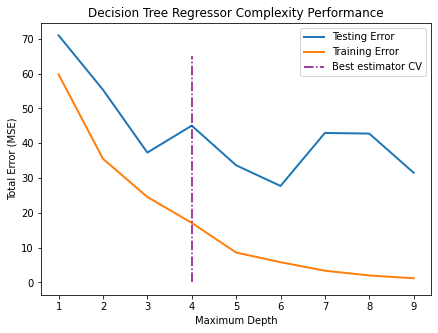

In [102]:
model_complexity(X_train, y_train, X_test, y_test)

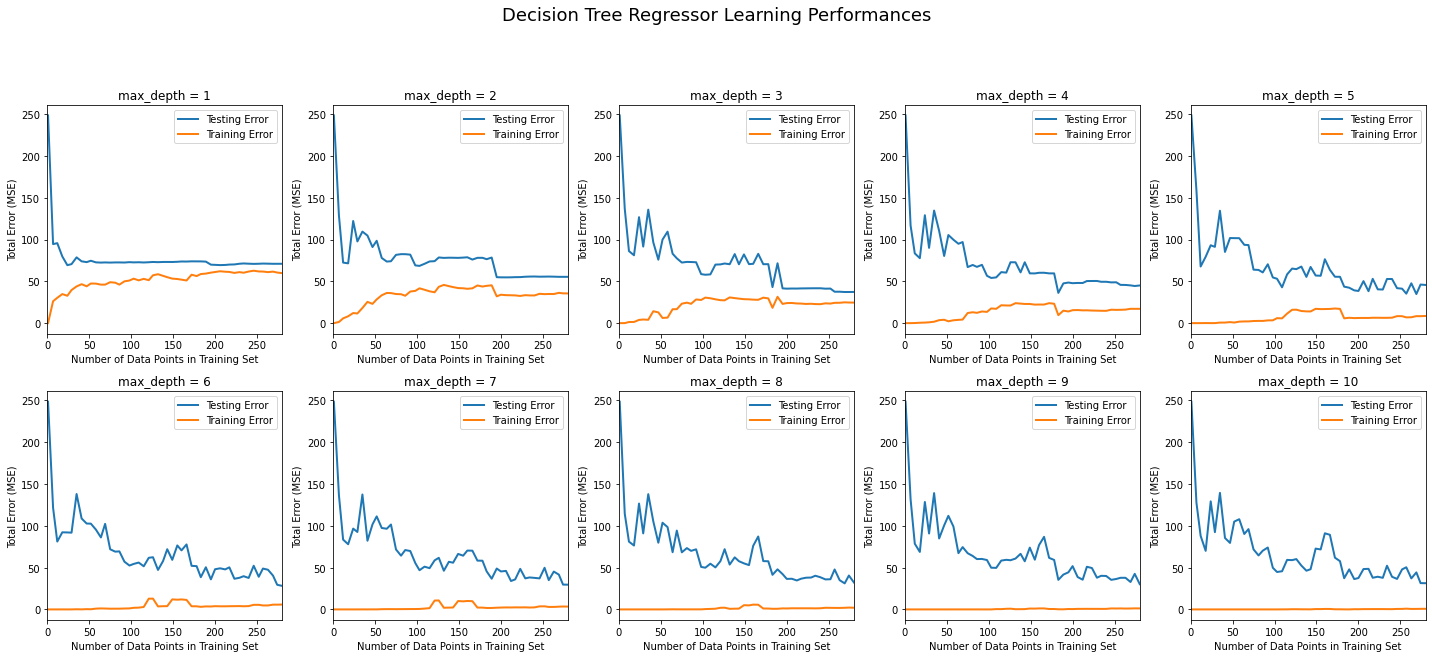

In [103]:
learning_curves(X_train, y_train, X_test, y_test)

Thus the pruned model has the following scores and MSE:

In [115]:
def last_model(reg, X_train, y_train, X_test, y_test ):
    """
    :param regressor: Regression algorithm (DecisionTreeRegressor() ...).
    :param X_train: Training features dataset.
    :param y_train: Training target dataset.
    :param X_test: Test features dataset.
    :param y_test: Test target dataset.
    :return: score_in_sample and score_out_sample.
    """
    #tree = DecisionTreeRegressor(max_depth = depth, random_state=0)
    reg.fit(X_train, y_train)
    MSE_in = MSE_metric(y_train, reg.predict(X_train))
    MSE_out = MSE_metric(y_test, reg.predict(X_test))
    print(f"MSE_in {MSE_in} | MSE_out {MSE_out}\n")
    return MSE_in, MSE_out

In [116]:
results = last_model(reg, X_train, y_train, X_test, y_test )


MSE_in 17.11916596463008 | MSE_out 45.055591220028745



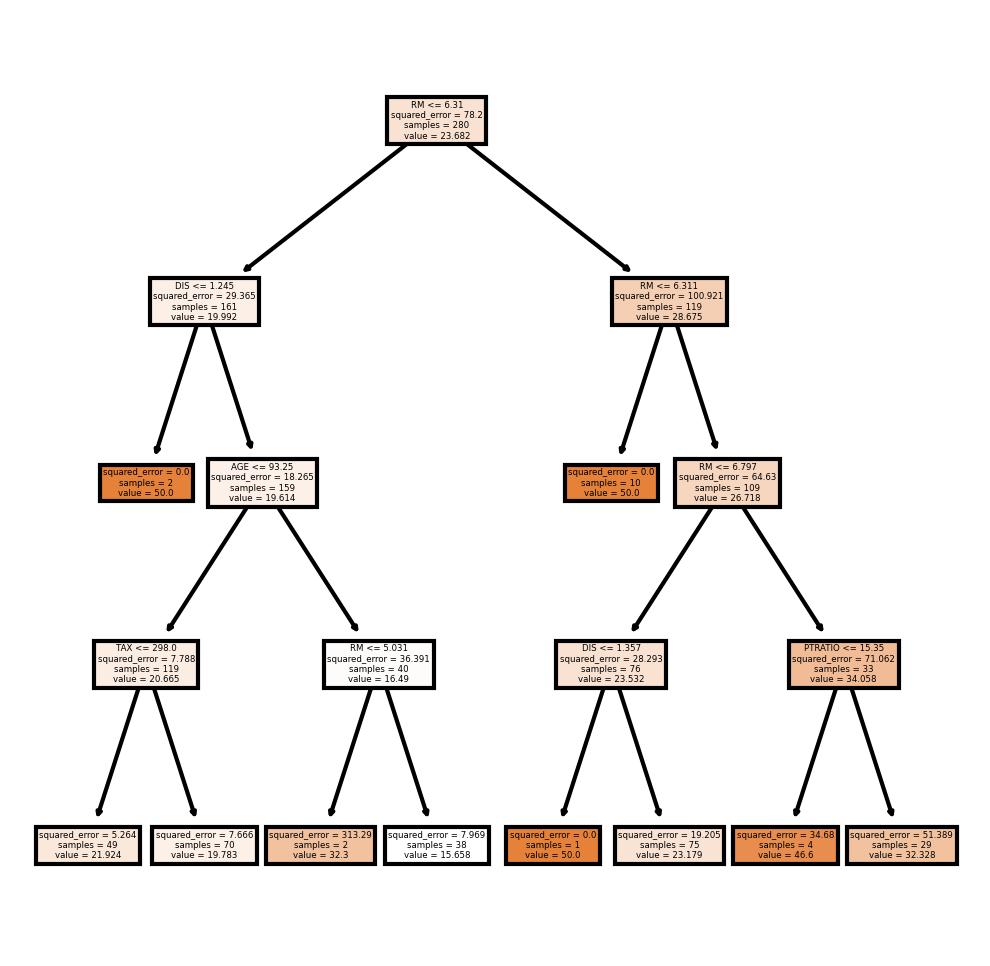

In [106]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(reg,
               feature_names = X.columns,
               class_names= ['MEDV'],
               filled = True);
fig.savefig('tree.png')



### Random forest

A critical parameter in this process is max_features. A high max_fea
tures means that the trees in the random forest will be quite similar, and they will be
able to fit the data easily, using the most distinctive features. A low max_features
means that the trees in the random forest will be quite different, and that each tree
might need to be very deep in order to fit the data well. [from : Introduction to Machine Learning with Python]

We will star using 10 trees, without max_depth , wohout out-of-bag samples to estimate the generalization score (oob_score) ,we will use all preccesors (with n_jobs = 1)

In [117]:
random_forest_model  = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'mse',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

results = last_model(random_forest_model, X_train, y_train, X_test, y_test )

MSE_in 6.029511785714287 | MSE_out 32.77597355371901



## Hyperparameter tuning

To find the optimal values of the hyperparameters we will use two different metrics. On the one hand we will do the validation using *Out-of-Bag error* and on the other hand, as in the case of the decision trees we will use the CV . 

First, let's calculate the number of trees that are necessary for the error to be stabilized. Although in random forest we do not have overfittin, the more trees, the higher the computational cost.

Optimum values max_features: 71


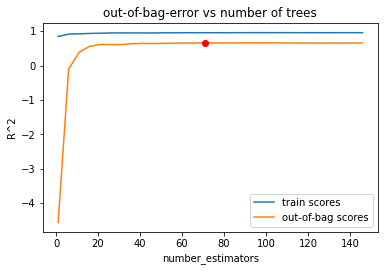

In [108]:
def plot_number_trees_oob(train_scores, oob_scores, max_features_range): 
  # Gráfico con la evolución de los errores
  fig, ax = plt.subplots(figsize=(6, 3.84))
  ax.plot(max_features_range, train_scores, label="train scores")
  ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
  ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
          marker='o', color = "red")
  ax.set_ylabel("R^2")
  ax.set_xlabel("number_estimators")
  ax.set_title("out-of-bag-error vs number of trees")
  plt.legend();
  print(f"Optimum values max_features: {max_features_range[np.argmax(oob_scores)]}")


def number_trees_oob(X_train, y_train):
  train_scores = []
  oob_scores   = []
  max_features_range = range(1, 150, 5)
  for max_features in max_features_range:
      random_forest_model = RandomForestRegressor(
                  n_estimators = max_features,
                  criterion    = 'mse',
                  max_depth    = None,
                  max_features = 'auto',
                  oob_score    = True,
                  n_jobs       = -1,
                  random_state = 123
              )
      random_forest_model.fit(X_train, y_train)
      train_scores.append(random_forest_model.score(X_train, y_train))
      oob_scores.append(random_forest_model.oob_score_)

  return train_scores, oob_scores, max_features_range


train_scores = number_trees_oob(X_train, y_train)[0]
oob_scores = number_trees_oob(X_train, y_train)[1]
max_features_range = number_trees_oob(X_train, y_train)[2]

plot_number_trees_oob(train_scores, oob_scores, max_features_range)

Optimum values max_features: 3


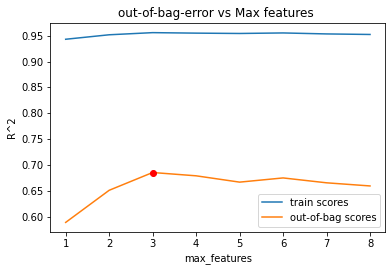

In [109]:
def plot_number_features_oob(train_scores, oob_scores, max_features_range): 
  # Gráfico con la evolución de los errores
  fig, ax = plt.subplots(figsize=(6, 3.84))
  ax.plot(max_features_range, train_scores, label="train scores")
  ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
  ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
          marker='o', color = "red")
  ax.set_ylabel("R^2")
  ax.set_xlabel("max_features")
  ax.set_title("out-of-bag-error vs Max features ")
  plt.legend();
  plt.savefig
  fig.savefig('n_treesOOB.png')
  print(f"Optimum values max_features: {max_features_range[np.argmax(oob_scores)]}")


def number_features(X_train, y_train, max_features_range):
  train_scores = []
  oob_scores   = []
  for max_features in max_features_range:
      random_forest_model = RandomForestRegressor(
                  n_estimators = 150,
                  criterion    = 'mse',
                  max_depth    = None,
                  max_features = max_features,
                  oob_score    = True,
                  n_jobs       = -1,
                  random_state = 123
              )
      random_forest_model.fit(X_train, y_train)
      train_scores.append(random_forest_model.score(X_train, y_train))
      oob_scores.append(random_forest_model.oob_score_)

  return train_scores, oob_scores


max_features_range = range(1, X_train.shape[1] + 1, 1)

train_scores = number_features(X_train, y_train, max_features_range)[0]
oob_scores = number_features(X_train, y_train, max_features_range)[1]

plot_number_features_oob(train_scores, oob_scores, max_features_range)

Let's do the same but using CV 

n_estimators: 1


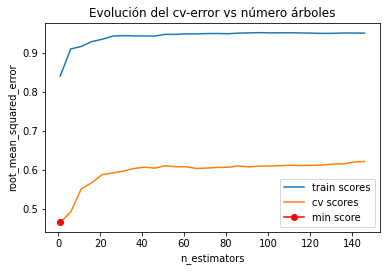

In [110]:
def plot_number_trees_cv(train_scores, cv_scores, estimator_range): 
  fig, ax = plt.subplots(figsize=(6, 3.84))
  ax.plot(estimator_range, train_scores, label="train scores")
  ax.plot(estimator_range, cv_scores, label="cv scores")
  ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
          marker='o', color = "red", label="min score")
  ax.set_ylabel("root_mean_squared_error")
  ax.set_xlabel("n_estimators")
  ax.set_title("Evolución del cv-error vs número árboles")
  plt.legend();
  print(f"n_estimators: {estimator_range[np.argmin(cv_scores)]}") 


def number_trees_cv(X_train, y_train, estimator_range ):
  train_scores = []
  cv_scores    = []
  for n_estimators in estimator_range:
      modelo = RandomForestRegressor(
                  n_estimators = n_estimators,
                  criterion    = 'mse',
                  max_depth    = None,
                  max_features = 'auto',
                  oob_score    = False,
                  n_jobs       = -1,
                  random_state = 123
              )
      modelo.fit(X_train, y_train)
      predicciones = modelo.predict(X = X_train)


      r2= r2_score(
              y_true  = y_train,
              y_pred  = predicciones,
      )
      # rmse = mean_squared_error(
      #         y_true  = y_train,
      #         y_pred  = predicciones,
      #         squared = False
      #       )
      #train_scores.append(rmse)
      train_scores.append(r2)
      scores = cross_val_score( estimator = modelo,
              X         = X_train,
              y         = y_train,
              scoring   = 'r2',
              cv        = 5
       )
      cv_scores.append(scores.mean())
      # scores = cross_val_score( estimator = modelo,
      #             X         = X_train,
      #             y         = y_train,
      #             scoring   = 'neg_root_mean_squared_error',
      #             cv        = 5
      #         )

      #cv_scores.append(-1*scores.mean())
  return train_scores, cv_scores

estimator_range = range(1, 150, 5)

train_scores = number_trees_cv(X_train, y_train, estimator_range )[0]
cv_scores = number_trees_cv(X_train, y_train, estimator_range )[1]
plot_number_trees_cv(train_scores, cv_scores, estimator_range)


Optimum value max_features: 5


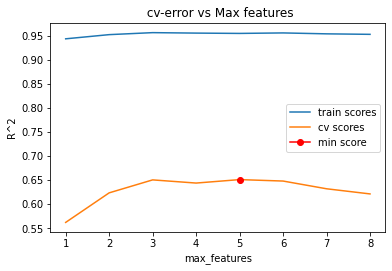

In [111]:
def plot_features_cv(train_scores, cv_scores, features_range): 
  fig, ax = plt.subplots(figsize=(6, 3.84))
  ax.plot(features_range, train_scores, label="train scores")
  ax.plot(features_range, cv_scores, label="cv scores")
  ax.plot(features_range[np.argmax(cv_scores)], max(cv_scores),
          marker='o', color = "red", label="min score")
  ax.set_ylabel("R^2")
  ax.set_xlabel("max_features")
  ax.set_title(" cv-error vs Max features")
  plt.legend();
  fig.savefig('Images/n_treesCV.png')
  # print(f"Optimum value max_features: {features_range[np.argmin(cv_scores)]}")
  print(f"Optimum value max_features: {features_range[np.argmax(cv_scores)]}")

def number_features_cv(X_train, y_train, features_range ):
  train_scores = []
  cv_scores    = []
  for max_features in features_range:
      modelo = RandomForestRegressor(
                  n_estimators = 150,
                  criterion    = 'mse',
                  max_depth    = None,
                  max_features = max_features,
                  oob_score    = False,
                  n_jobs       = -1,
                  random_state = 123
              )
      modelo.fit(X_train, y_train)
      predicciones = modelo.predict(X = X_train)
      r2= r2_score(
              y_true  = y_train,
              y_pred  = predicciones,
      )
      train_scores.append(r2)
      scores = cross_val_score( estimator = modelo,
              X         = X_train,
              y         = y_train,
              scoring   = 'r2',
              cv        = 5
       )
      cv_scores.append(scores.mean())

  return train_scores, cv_scores

max_features_range = range(1, X_train.shape[1] + 1, 1)

# train_scores = number_features_cv(X_train, y_train, max_features_range )[0]
# cv_scores = number_features_cv(X_train, y_train, max_features_range )[1]

results_cv = number_features_cv(X_train, y_train, max_features_range )
train_scores = results_cv[0]
cv_scores = results_cv[1]

plot_features_cv(train_scores, cv_scores, max_features_range)

So, as we can see, the optimum feature nuber value is between [3,4] and the error is stabilised for some number of trees value between [91,146] onwards. 

Now, we will use grid search to analyse various combinations of hyperparameters.

The number of trees selected for the analysis will be 150. So, we wil combine different values of features and trees depth.



In [112]:
import multiprocessing
from sklearn.model_selection import RepeatedKFold

def Grid_Search_CV(param_grid):
  """
    : param_grid: 
    : return: trained model with 
  """
  grid = GridSearchCV(
          estimator  = RandomForestRegressor(random_state = 123),
          param_grid = param_grid,
          scoring    = 'neg_root_mean_squared_error',
          n_jobs     = multiprocessing.cpu_count() - 1,
          cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
          refit      = True,
          verbose    = 0,
          return_train_score = True
        )
  grid.fit(X = X_train, y = y_train)
  return grid



param_grid = {'n_estimators': [150],
              'max_features': [3, 4],
              'max_depth'   : [None, 3, 10, 20]
             }
CV_RF_model = Grid_Search_CV(param_grid)

results = pd.DataFrame(CV_RF_model.cv_results_)
results.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
5,10,4,150,-5.055247,0.722655,-2.010949,0.089439
1,None,4,150,-5.060633,0.691872,-1.969955,0.103568
7,20,4,150,-5.062549,0.690892,-1.970741,0.104540
0,None,3,150,-5.093902,0.738963,-1.998539,0.089874


Therefore, if we use the best model (the one with 150 trees, 4 features and 10 of depth) we get the following result:

In [118]:
last_RF_model = CV_RF_model.best_estimator_
predctions =  last_model(last_RF_model, X_train, y_train, X_test, y_test )

MSE_in 3.5925715319886438 | MSE_out 22.739109677425926



In this way we have improved our score from 0.63 to 0.73. That is, we have improved our model by ~15%.